# Next learner

This notebook trains a machine learning model that predicts the next number of a
Collatz sequence

## Meta data

In [50]:
"""
This notebook trains a machine learning model that predicts the next number of a
Collatz sequence. It builds on a sample of sequences, stored in the csv
file: data/basic_export.csv. The file can be generated by executing the
script run_basic_export.py.
"""

# Imports
# Fix possible import problems
import sys
sys.path.append("../..")

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split


# Configuration
DATA_PATH = Path.cwd().parent.parent.as_posix() + "/data/"
CSV_PATH = DATA_PATH + "basic_export.csv"

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Load data from csv
K_FACTOR = 3
analysis_frame = pd.read_csv(
    CSV_PATH, dtype={"x_i": object, "x_i+" : object})

# Filter data set
analysis_frame = analysis_frame[analysis_frame["k"] == K_FACTOR]
sequence_count = int(analysis_frame["sequence_id"].nunique())

print("K:", K_FACTOR)
print("Collatz sequences in sample:", sequence_count, "\n")

# Split Training and Test set
training_frame, test_frame = train_test_split(analysis_frame, test_size=0.3)

print("Size training set: ", len(training_frame))
print("Size test set: ", len(test_frame))


K: 3
Collatz sequences in sample: 2000 

Size training set:  83475
Size test set:  35776


## Predict next Collatz number

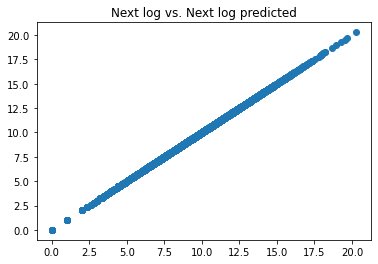

Linear Model
Intercept: -0.987260482490063
Features: ['x_i_log2', 'x_i_odd']
Coeff: [0.99850736 2.59288791]
R^2: 0.9999878160591738


In [51]:
# Features
next_log_target = "x_i+_log2"
next_log_features = ["x_i_log2", "x_i_odd"]

# Create Training Set
next_log_training_target = training_frame[next_log_target]
next_log_training_features = training_frame[next_log_features]

# Create Test set
next_log_test_target = test_frame[next_log_target]
next_log_test_features = test_frame[next_log_features]

# Train Linear Model
next_log_regression = linear_model.LinearRegression()
next_log_regression.fit(next_log_training_features, next_log_training_target)

# Test Linear Model
next_log_predicted = next_log_regression.predict(next_log_test_features)

plt.figure()
plt.title("Next log vs. Next log predicted")
plt.plot(next_log_predicted, next_log_test_target,  "o")
plt.show()

print("Linear Model")
print("Intercept:", next_log_regression.intercept_)
print("Features:", next_log_features)
print("Coeff:", next_log_regression.coef_)
print("R^2:", next_log_regression.score(
    next_log_training_features, next_log_training_target))